In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


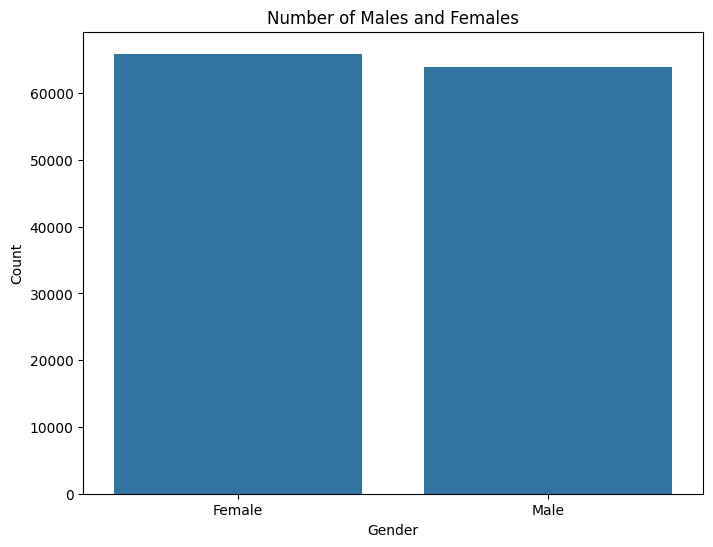

In [32]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


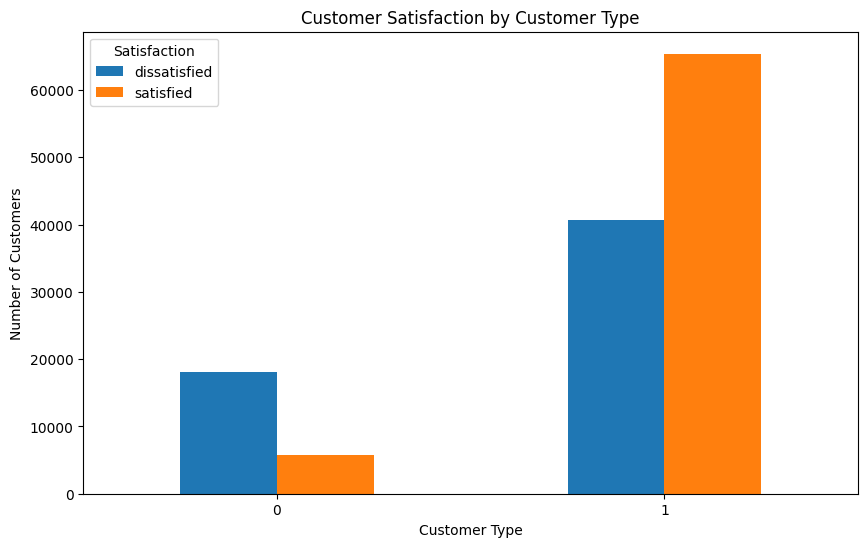

In [54]:
customer_satisfaction_counts = data.groupby(['Customer Type', 'satisfaction']).size().unstack(fill_value=0)

customer_satisfaction_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Customer Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction')
plt.show()

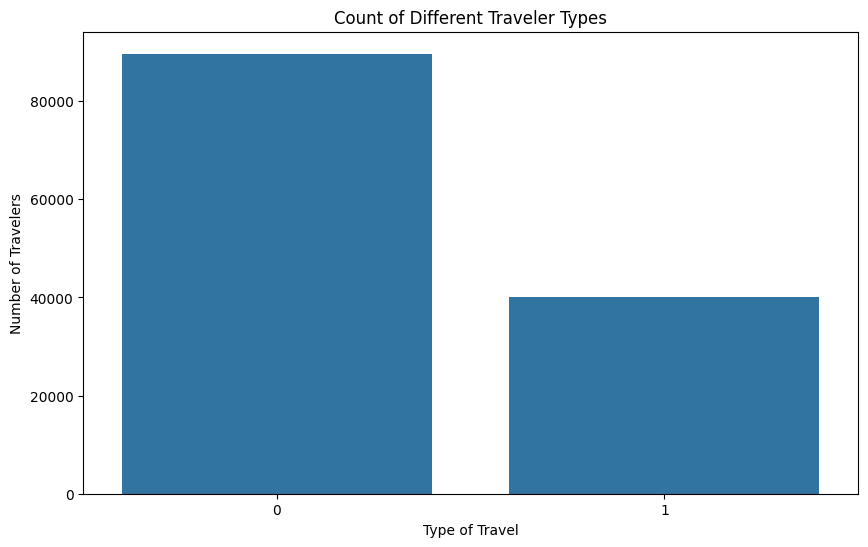

In [55]:
traveler_counts = data['Type of Travel'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=traveler_counts.index, y=traveler_counts.values)
plt.title('Count of Different Traveler Types')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Travelers')
plt.show()


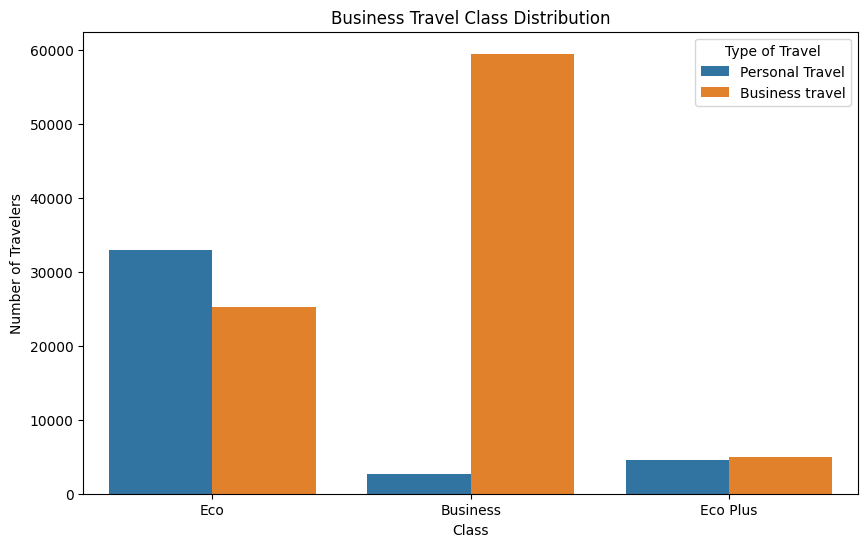

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Type of Travel', data=data)
plt.title('Business Travel Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Travelers')
plt.show()


In [74]:
data['Type of Travel'] = data['Type of Travel'].replace({'Personal Travel': 1, 'Business travel': 0})

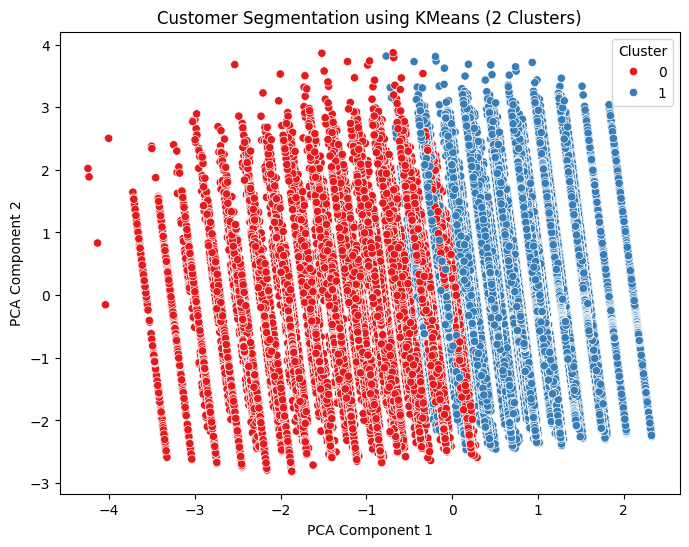

In [81]:
features = ['Type of Travel', 'Flight Distance', 'Seat comfort', 'Ease of Online booking', 'Cleanliness']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

data['cluster'] = data['cluster'].astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=components[:, 0],
    y=components[:, 1],
    hue=data['cluster'],
    palette='Set1',
    legend='full'
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using KMeans (2 Clusters)')
plt.legend(title='Cluster')
plt.show()


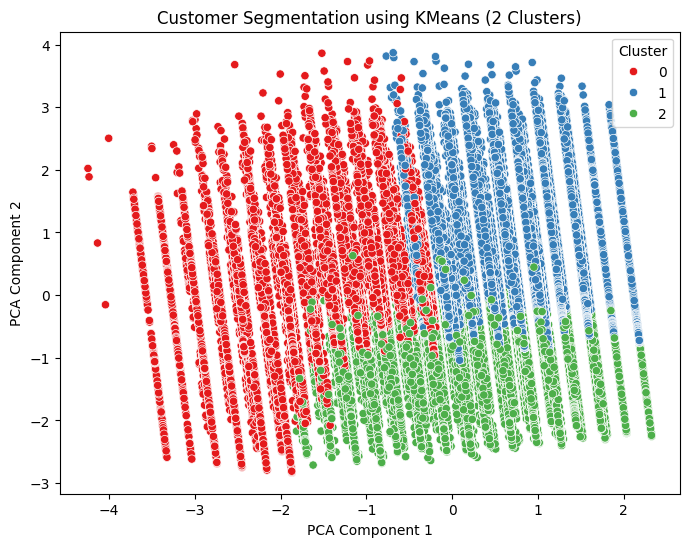

In [83]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
data['cluster'] = data['cluster'].astype(int)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=components[:, 0],
    y=components[:, 1],
    hue=data['cluster'],
    palette='Set1',
    legend='full'
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using KMeans (2 Clusters)')
plt.legend(title='Cluster')
plt.show()


In [84]:
cluster_profile = data.groupby('cluster')[features].mean()
print(cluster_profile)

         Type of Travel  Flight Distance  Seat comfort  \
cluster                                                  
0              0.075938      2039.285436      2.269903   
1              0.000000      2072.262584      3.159533   
2              1.000000      1789.210857      2.925380   

         Ease of Online booking  Cleanliness  
cluster                                       
0                      2.201448     2.608369  
1                      4.259088     4.256799  
2                      3.562232     3.974556  


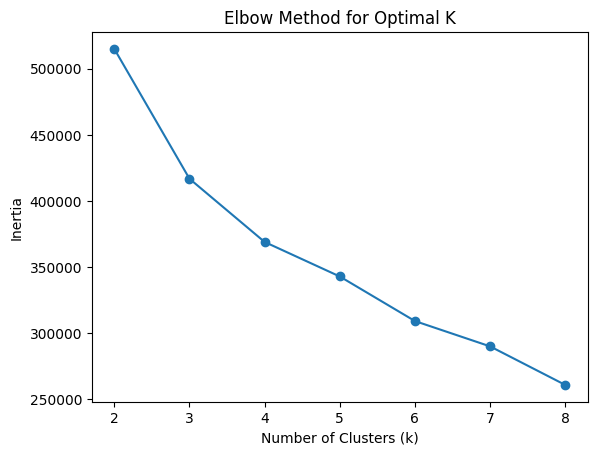

In [79]:
inertia = []
K_range = range(2, 9)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()